In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_final_dataset.csv')
df



,Economy,Indicator,Year,Value,Indicator_encoded,Economy_encoded,Indicator_group,Indicator_group_code
0,Brazil,Desktop computer,2014,28.27150,16,12,Device,0
1,Brazil,Laptop computer,2014,30.49600,41,12,Device,0
2,Brazil,Tablet,2014,16.51860,53,12,Device,0
3,Colombia,Desktop computer,2014,27.48370,16,19,Device,0
4,Colombia,Laptop computer,2014,24.21300,41,19,Device,0
...,...,...,...,...,...,...,...,...
10979,Türkiye,Taking part in online consultations or voting ...,2024,4.78936,54,90,Services and Communications,5
10980,United Arab Emirates,Sending e-mails with attached files,2024,100.00000,50,92,Services and Communications,5
10981,United Arab Emirates,Making calls using VoIP or messaging app,2024,89.93150,42,92,Services and Communications,5
10982,United Arab Emirates,Participating in social networks,2024,70.87500,45,92,Services and Communications,5


/var/folders/00/27c9n4h9111532lvvxdl22dr0000gn/T/ipykernel_82741/1790350531.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_means.values, y=group_means.index, palette='viridis')


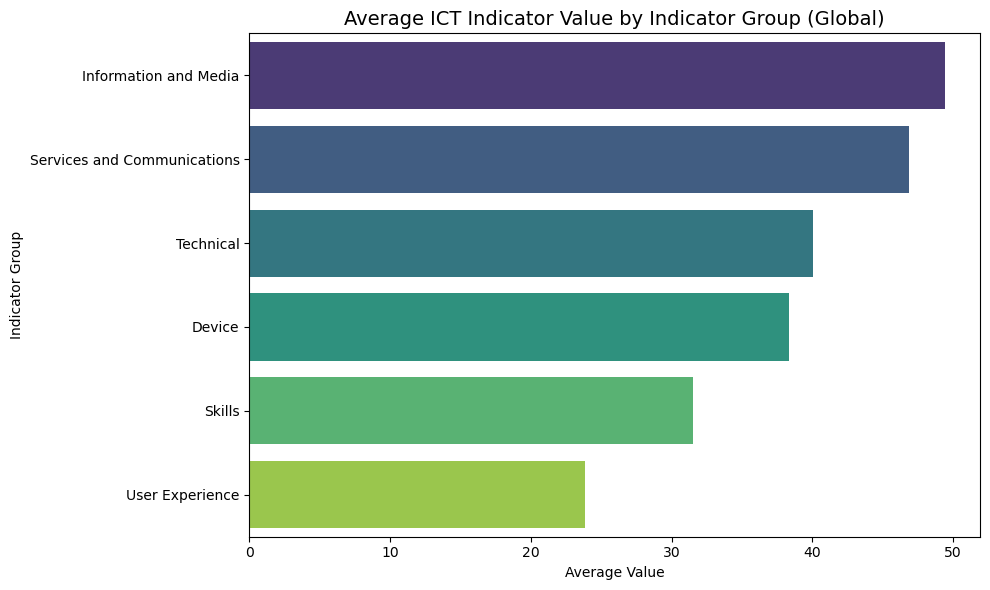

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10,6))
group_means = df.groupby('Indicator_group')['Value'].mean().sort_values(ascending=False)

sns.barplot(x=group_means.values, y=group_means.index, palette='viridis')
plt.title('Average ICT Indicator Value by Indicator Group (Global)', fontsize=14)
plt.xlabel('Average Value')
plt.ylabel('Indicator Group')
plt.tight_layout()
plt.show()



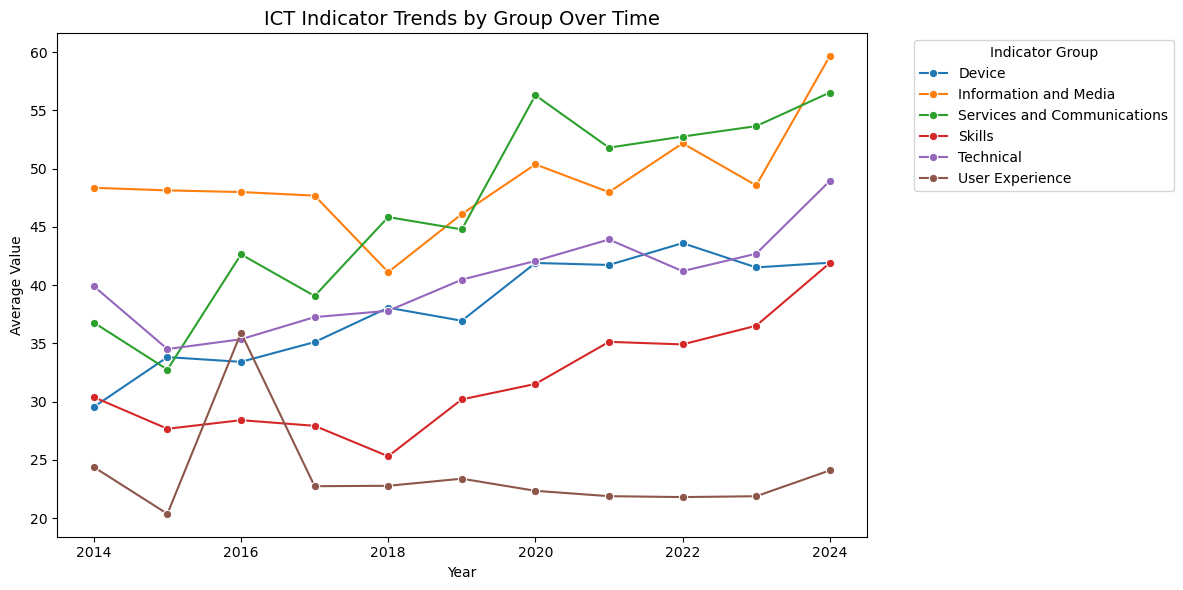

In [8]:
plt.figure(figsize=(12,6))
trend_data = df.groupby(['Year', 'Indicator_group'])['Value'].mean().reset_index()

sns.lineplot(data=trend_data, x='Year', y='Value', hue='Indicator_group', marker='o')
plt.title('ICT Indicator Trends by Group Over Time', fontsize=14)
plt.ylabel('Average Value')
plt.xlabel('Year')
plt.legend(title='Indicator Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



/var/folders/00/27c9n4h9111532lvvxdl22dr0000gn/T/ipykernel_82741/2267962910.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, ax=axes[0], palette='crest')
/var/folders/00/27c9n4h9111532lvvxdl22dr0000gn/T/ipykernel_82741/2267962910.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom10.values, y=bottom10.index, ax=axes[1], palette='rocket')


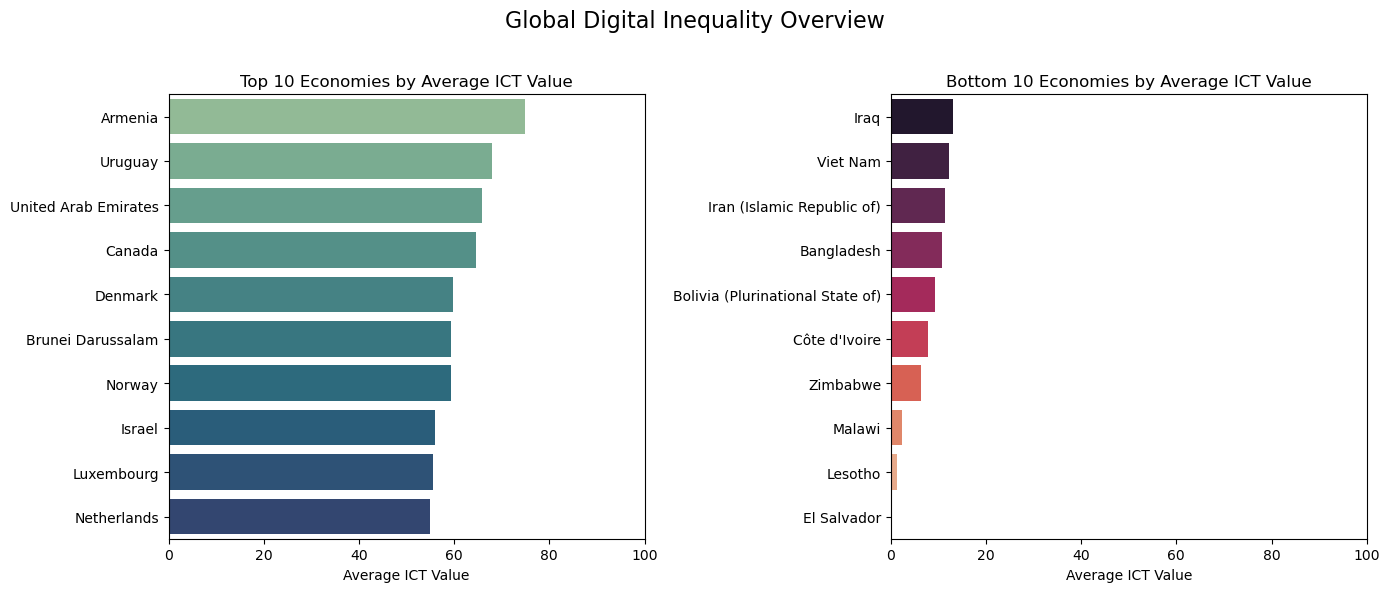

In [9]:
economy_means = df.groupby('Economy')['Value'].mean().sort_values(ascending=False)

top10 = economy_means.head(10)
bottom10 = economy_means.tail(10)

fig, axes = plt.subplots(1, 2, figsize=(14,6), sharex=True)
sns.barplot(x=top10.values, y=top10.index, ax=axes[0], palette='crest')
sns.barplot(x=bottom10.values, y=bottom10.index, ax=axes[1], palette='rocket')

axes[0].set_title('Top 10 Economies by Average ICT Value')
axes[1].set_title('Bottom 10 Economies by Average ICT Value')

for ax in axes:
    ax.set_xlabel('Average ICT Value')
    ax.set_ylabel('')
    ax.set_xlim(0, 100)

plt.suptitle('Global Digital Inequality Overview', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
